In [1]:
import pymc3 as pm
import numpy as np
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
figsize(12.5, 4)

In [2]:
??pm.Normal

## ET Error

In [97]:
et_prior_mean_AR = 0
et_prior_sd_AR = 0.2
et_log_mean= np.log(prior_mean_AR)
et_log_sd= np.log(prior_sd_AR)

with pm.Model() as model:
    et_prior = pm.Normal("et_prior", mu=et_prior_mean_AR, sd=et_prior_sd_AR)

In [98]:
et_samples = [et_prior.random() for i in xrange(4000)]

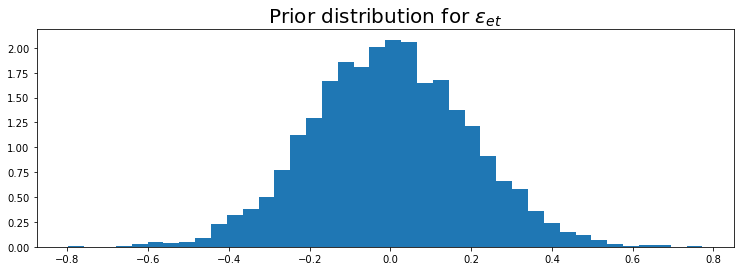

In [100]:
plt.hist(et_samples, bins=40, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\epsilon_{et}$", fontsize=20)
figsize(12.5, 4)

**TODO:** Add ET error data to get posterior distribution

## Boundary Error

Utility boundary polygons are not guaranteed to be correct, however we assume that many (most?) of them are. Thus we model the actual utility landscape area $LA^\star$ as a function of our estimated utility landscape area ($\hat{LA}$) plus a relative error term:

$$LA^\star = \hat{LA} + \hat{LA} \times \epsilon_{boundary} = \hat{LA} \times (1 + \epsilon_{boundary})$$


Since we don't have data on how our boundary error is distrubuted, we must assume a prior. We could model $ \epsilon_{boundary}$ as normally distributed, but that would ignore our prior knowledge that most of the boundaries are correct. Instead we model $ \epsilon_{boundary}$ as

$$\epsilon_{boundary} = Bernoulli(p_b) \times N(\mu_b, \sigma_b^2)$$

Where 

$p_b$ is the probability of the boundary being **incorrect**, and

$N(\mu_b, \sigma_b^2)$ describes the distribution of the relative magnitude of the error.

We assume values for our prior parameters

In [105]:
p_b = 0.5
mu_b = 0
sd_b = 0.1

In [106]:
with pm.Model() as model:
    has_boundary_error = pm.Bernoulli("has_boundary_error", p=p_b)
    boundary_error_dist = pm.Normal("boundary_error_dist", mu=mu_b, sd=sd_b)
#     boundary_prior = pm.Deterministic("boundary_prior", has_boundary_error*boundary_error_dist)

In [107]:
boundary_samples = [has_boundary_error.random()*boundary_error_dist.random() for i in xrange(4000)]

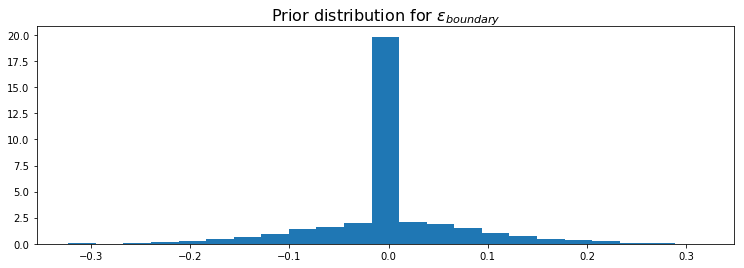

In [109]:
plt.hist(boundary_samples, bins=23, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\epsilon_{boundary}$", fontsize=16)
figsize(12.5, 4)

In [69]:
# with model:
#     trace = pm.sample(10000)
#     burned_trace=trace[1000:]

In [66]:
# boundary_samples = burned_trace["boundary_prior"]

## Classification error

In [140]:
??pm.Exponential

In [67]:
np.exp(np.log(.038))

0.038000000000000006

In [88]:
with pm.Model() as model:
    class_sd = pm.Exponential("class_sd", lam=7.6)
    class_sd2 = pm.Lognormal("class_sd2", mu=np.log(.038), sd=0.4 )
    class_dist = pm.Normal("class_dist", mu=0, sd=2*0.038)

In [89]:
class_samples = [class_dist.random() for i in xrange(4000)]

In [90]:
np.percentile(class_samples, [2.5,97.5])

array([-0.15285675,  0.14875167])

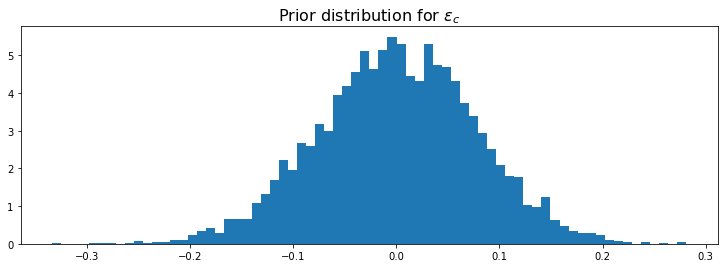

In [91]:
plt.hist(class_samples, bins=70, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\epsilon_{c}$", fontsize=16)
figsize(12.5, 4)

In [24]:
np.percentile(class_samples, [5,95])

array([-0.06114859,  0.06132485])

In [135]:
acc = np.array([[307, 50],[25,615]],  np.int32)

In [138]:
Other = 0
PSAV = 1

j = PSAV #class of interest is PSAV area

W_other = 


s_pj = snp.sum(acc[1])

640

CGU provided a pixel-based classification accuracy of 89%. Restated this means that 11% of pixels are incorrectly classified. However, we can't directly translate a pixel-based classification error of 0.11 into error bounds on landscape area (e.g. $\pm$11%). Fortunately, we can work around this by embedding our pixel error into a probabilistic framework describing how aggregate landscape area responds to changes in pixel classification error.

To begin, we treat our classifier $CILA$ as binary (1 = Landscape Area, 0 = Other area). For a given pixel $i$, we model the classification as the true value of the pixel, $T \in \{1,0\}$ plus an error term

$$CILA_i = T_i +  S(T_i)*\epsilon_c$$

where $S$ is an indicator function equal to $1$ if $T_i=0$, and $-1$ if $T_i=1$

Doing this allows us to model $\epsilon_c$ as a Bernoulli random variable equal to $1$ for a misclassification. That is 

$$\epsilon_c = Bernoulli(0.11)$$

To get the error for



$$\epsilon_p = Bernoulli(0.11) * (2 * Bernoulli(0.5) - 1)$$


In [123]:
p_c = 0.11
mu_ac = 0.6
sd_ac = 0.1

In [126]:
with pm.Model() as model:
    class_is_incorrect = pm.Bernoulli("class_is_incorrect", p=p_c)
#     autocorrelation = pm.Normal("autocorrelation", mu=mu_ac, sd=sd_ac)
    class_error_direction = pm.Bernoulli("class_error_direction", p=0.7)
    
    utility_class_error

In [127]:
class_samples = [class_is_incorrect.random()*(2*class_error_direction.random() - 1) for i in xrange(4000)]

In [128]:
np.sum(class_samples)

208

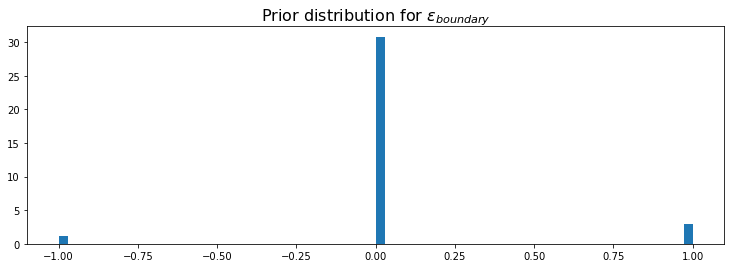

In [129]:
plt.hist(class_samples, bins=70, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\epsilon_{boundary}$", fontsize=16)
figsize(12.5, 4)

## Overall Error

The equation for the the estimated outdoor efficiency targets used in this methodology is

$$Outdoor Target = Outdoor Standard * \hat{LA} * \hat{ET} * Conversion Factor$$

Combining the outdoor standard and the conversion factor into a constant $C$, and substituting in our error models gives

$$Outdoor Target = C * LA * (1 + \epsilon_{classification} * \epsilon_{boundary} * \epsilon_{landuse}) * ET*(1 + \epsilon_{et})$$

In [105]:
with pm.Model() as model:
    et_prior = pm.Lognormal("et_prior", mu=0, sd=0.1)
#     has_boundary_error = pm.Bernoulli("has_boundary_error", p=0.5)
    boundary_prior = pm.Lognormal("boundary_prior", mu=0, sd=0.1)
    landuse_prior = pm.Lognormal("landuse_prior", mu=0, sd=0.1)
    classification_prior = pm.Lognormal("classification_prior", mu=0, sd=2*0.038)

In [110]:
class_samples = [et_prior.random()*boundary_prior.random()*landuse_prior.random()*classification_prior.random() for i in xrange(10000)]

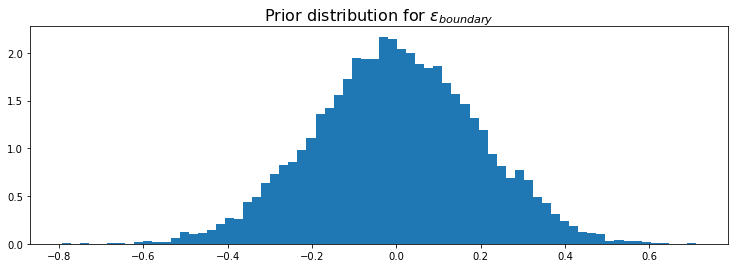

In [111]:
plt.hist(np.log(class_samples), bins=70, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\epsilon_{boundary}$", fontsize=16)
figsize(12.5, 4)

In [112]:
np.percentile(np.log(class_samples), [2.5,97.5])

array([-0.38204793,  0.3720369 ])